## Project 2 Proposal Template

Use this template to create your proposal for Project 2.

## Data:

- One paragraph description of your data:


The data had about 170k rows and 19 columns with 18 variables for a song.
The data describes the array of songs the users have available to listen to
These songs are described in variables that can help predict popularity
Popularity is based on the total number of plays and how recent those plays are.



## Team members:

- Harsh Vibhuti (Manager)

Used linear regression to fit a model to predict popularity.

Used Nearest neighbour to make a model for recommending top 10 songs based on one of user's favourite song by name or id.

- Luz Solorzano

Finding what factors cause a track to be more popular than others.

Categorizing the data into bins and foinding factors influencing popularity in all three different popularity categories namely low, mid and high.



List all of the team members using bullet points, and indicate which team member is the manager. Give a one to two sentence description of the planned duties and responsibilities of each team member.

## Project description

Give a description of your project. The description should be in paragraph form, at be at least one paragraph long. You should address the following points:

We looked into adressing the following Questions:

- What factors cause a track to be more popular than others?

- Are there any combinations of factors that tend to always (highly often) make certain tracks very popular?

- Are there any combinations of factors that tend to always (highly often) make certain tracks very unpopular?

- Is it possible to fit the variables into a Linear Regression model that could predict popularity of a song.


- Given some subset of songs which a person likes, we wanted to build a model which recommends other similar songs.

## Manager's section
The project was little challenging initially. We started a week later mostly due to scheduling issues. Hannah, one of our teammates probably dropped the class so we spend some time initially waiting for her as well as we were not sure what to do next. We ran into some scheduling issues but we we're able to meet on zoom and work through it. It was a friendly work with the team and everything turned out to be smooth teamwork wise. The final presentation was finished last moment but we were able to do a practice presentation seperately and on the day of presentation it was smooth as well.


We started with finding factors that influence the popularity and then moved on to fit a model that predicted popularity based on the variable. There were very few songs with popularity more that 60 so we decided to seperate the data into three bins and see what factors influence popularity in those bins. Then we used the nearest neighbour to make a model that could recommend top 10 similar song that the user might like and then used that to predict/recommend top 10 songs. The results came out good from the model.



In [24]:
import pandas as pd
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/spotify_tracks.csv")

In [26]:
df.shape

(170653, 19)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [28]:
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])
# correlation1 = df['valence'].corr(df['popularity'])


correlation_col = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'liveness','loudness', 'mode', 'speechiness','tempo' ]

correlations = {}
for column in correlation_col:
    correlations[column] = df['popularity'].corr(df[column])

# Print the correlations
for column, correlation in correlations.items():
    print(f"The correlation between 'popularity' and '{column}' is {correlation}")



The correlation between 'popularity' and 'valence' is 0.01420043340375135
The correlation between 'popularity' and 'year' is 0.8624420111063598
The correlation between 'popularity' and 'acousticness' is -0.5731617749444377
The correlation between 'popularity' and 'danceability' is 0.1996061654709465
The correlation between 'popularity' and 'duration_ms' is 0.059596666504401284
The correlation between 'popularity' and 'energy' is 0.48500503965325853
The correlation between 'popularity' and 'explicit' is 0.19154277307896375
The correlation between 'popularity' and 'instrumentalness' is -0.2967502543259352
The correlation between 'popularity' and 'liveness' is -0.07646407487238253
The correlation between 'popularity' and 'loudness' is 0.45705061592165486
The correlation between 'popularity' and 'mode' is -0.028897057067006956
The correlation between 'popularity' and 'speechiness' is -0.17197871776654758
The correlation between 'popularity' and 'tempo' is 0.13331015465969334


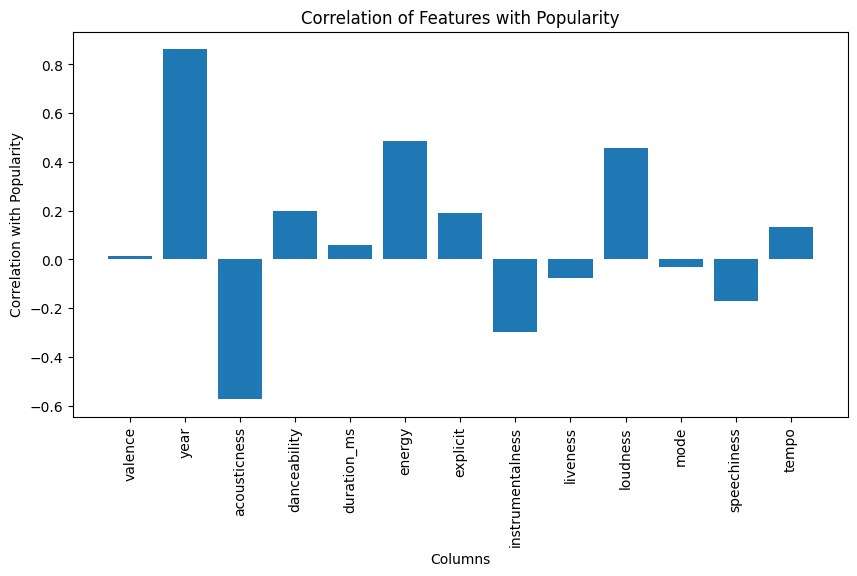

In [29]:
import matplotlib.pyplot as plt

# Assuming correlations is your dictionary containing column-correlation pairs
plt.figure(figsize=(10, 5))
plt.bar(correlations.keys(), correlations.values())
plt.xlabel('Columns')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation of Features with Popularity')
plt.xticks(rotation=90)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
           'explicit', 'instrumentalness', 'liveness','loudness', 'mode', 'speechiness','tempo' ]

X = df[columns]
y = df['popularity']

train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(train_df[X.columns], train_df[y.name])

# Make predictions
y_pred = lr.predict(test_df[X.columns])

# Calculate the root mean squared error
rmse = mean_squared_error(test_df[y.name], y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

lr.coef_


Root Mean Squared Error: 10.784492580194637


array([ 7.10235287e-01,  6.68402489e-01, -4.20197757e+00,  2.57172730e+00,
       -3.08671192e-07, -1.76355430e+00,  9.33359802e-01, -4.20783474e+00,
       -2.95624056e+00,  1.46345508e-02, -1.95415939e-01, -7.75526946e+00,
        8.22288927e-04])

Text(0.5, 1.0, 'Actual vs Predicted Popularity')

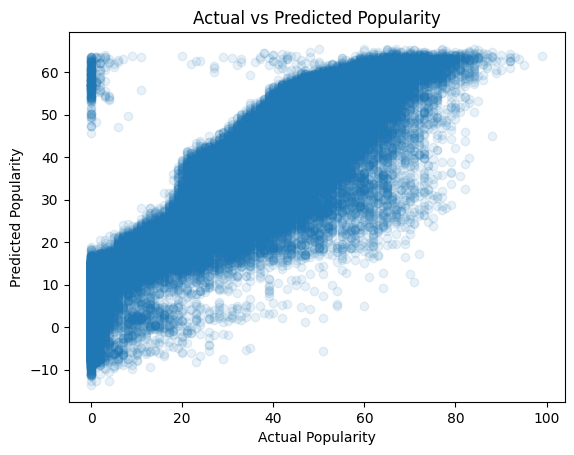

In [31]:

plt.scatter(test_df[y.name], y_pred, alpha=0.1)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')

In [32]:
#0.240	2020	0.8150	['Bryson Tiller']	0.467	179188	0.4290	0	6Iw6fQVKZi0fWtEQBrTFcP	0.000052	6	0.1770	-8.689	0	Timeless Interlude	65	2020-10-02	0.0964	148.530

custom_variables = pd.DataFrame({
    'valence': [0.24],
    'year': [2020],
    'acousticness': [0.8150],
    'danceability': [0.467],
    'duration_ms': [179188],
    'energy': [0.4290],
    'explicit': [0],
    'instrumentalness': [0.000052],
    'liveness': [0.1770],
    'loudness': [-8.689],
    'mode': [0],
    'speechiness': [0.0964],
    'tempo': [148.53]

})

# Predict the popularity of the song
popularity_pred = lr.predict(custom_variables)

print(f"The predicted popularity of the song is {popularity_pred}")

The predicted popularity of the song is [59.66660029]


#Nearest Neighbour

In [33]:
from sklearn.neighbors import NearestNeighbors

features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Fit on Df
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11, n_jobs=-1)
model_knn.fit(df[features])

def recommend_songs(song_name, df, model, n_recommendations):
    song = df[df['name'] == song_name]
    distances, indices = model.kneighbors(song[features].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print(f'Recommendations for {song_name}:\n')
        else:
            print(f'{i}: {df.iloc[indices.flatten()[i]]["name"]} by {df.iloc[indices.flatten()[i]]["artists"]}')

recommend_songs('Gati Bali', df, model_knn, 10)


Recommendations for Gati Bali:

1: Blue Monk - Live At The Five Spot / August 7, 1958 by ['Thelonious Monk Quartet', 'Johnny Griffin']
2: Woody 'N You (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder Edition by ['Sonny Rollins']
3: Soul-Lo Blues by ['Cliff Jordan']
4: Genoveva, Op. 81: Overture by ['Robert Schumann', 'Gewandhausorchester Leipzig', 'Kurt Masur']
5: Piano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto grazioso by ['Johannes Brahms', 'Vladimir Horowitz', 'Arturo Toscanini', 'NBC Symphony Orchestra']
6: If I Were A Bell - live by ['Miles Davis']
7: Better Git It In Your Soul - Alternate by ['Charles Mingus']
8: Four - Live At The Village Vanguard, New York City, NY/1957 Evening Take by ['Sonny Rollins']
9: Sonata in B Minor: Andante espressivo by ['Ottorino Respighi', 'Jascha Heifetz']
10: Blue Monk - Live At The Five Spot / August 7, 1958 by ['Thelonious Monk Quartet', 'Johnny Griffin']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.neighbors import NearestNeighbors

features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Fit on Df
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11, n_jobs=-1)
model_knn.fit(df[features])

def recommend_songs(song_id, df, model, n_recommendations):
    song = df[df['id'] == song_id]
    distances, indices = model.kneighbors(song[features].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print(f'Recommendations for {song_id}:\n')
        else:
            print(f'{i}: {df.iloc[indices.flatten()[i]]["name"]} by {df.iloc[indices.flatten()[i]]["artists"]}')

recommend_songs('1o6I8BglA6ylDMrIELygv1', df, model_knn, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Recommendations for 1o6I8BglA6ylDMrIELygv1:

1: Blue Monk - Live At The Five Spot / August 7, 1958 by ['Thelonious Monk Quartet', 'Johnny Griffin']
2: Woody 'N You (Evening) - Live From Village Vanguard/1957/The Rudy Van Gelder Edition by ['Sonny Rollins']
3: Soul-Lo Blues by ['Cliff Jordan']
4: Genoveva, Op. 81: Overture by ['Robert Schumann', 'Gewandhausorchester Leipzig', 'Kurt Masur']
5: Piano Concerto No. 2 in B-Flat Major, Op. 83: IV. Allegretto grazioso by ['Johannes Brahms', 'Vladimir Horowitz', 'Arturo Toscanini', 'NBC Symphony Orchestra']
6: If I Were A Bell - live by ['Miles Davis']
7: Better Git It In Your Soul - Alternate by ['Charles Mingus']
8: Four - Live At The Village Vanguard, New York City, NY/1957 Evening Take by ['Sonny Rollins']
9: Sonata in B Minor: Andante espressivo by ['Ottorino Respighi', 'Jascha Heifetz']
10: Blue Monk - Live At The Five Spot / August 7, 1958 by ['Thelonious Monk Quartet', 'Johnny Griffin']


In [35]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [36]:
correlation = df.corr()['popularity'].sort_values(ascending=False)


<ipython-input-36-00c2abfd4b83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['popularity'].sort_values(ascending=False)


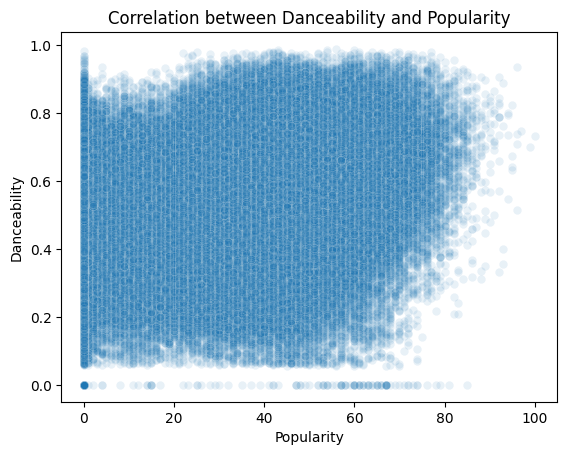

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
sns.scatterplot(x='popularity', y='danceability', data=df, alpha=0.1)

plt.title('Correlation between Danceability and Popularity')
plt.ylabel('Danceability')
plt.xlabel('Popularity')
plt.show()


Corr b/w energy and popularity is 0.48500503965325853


Text(0.5, 1.0, 'Correlation between energy and Popularity')

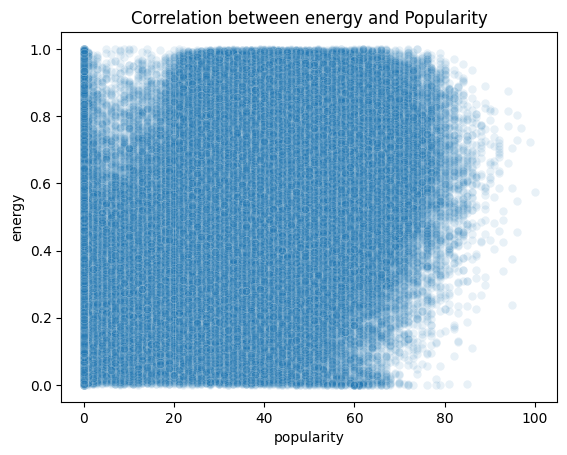

In [38]:
correlation1 = df['energy'].corr(df['popularity'])
print(f"Corr b/w energy and popularity is {correlation1}")
sns.scatterplot(x='popularity', y='energy', data=df, alpha=0.1)

plt.title('Correlation between energy and Popularity')

Corr b/w year and popularity is 0.8624420111063597


Text(0.5, 1.0, 'Correlation between year and Popularity')

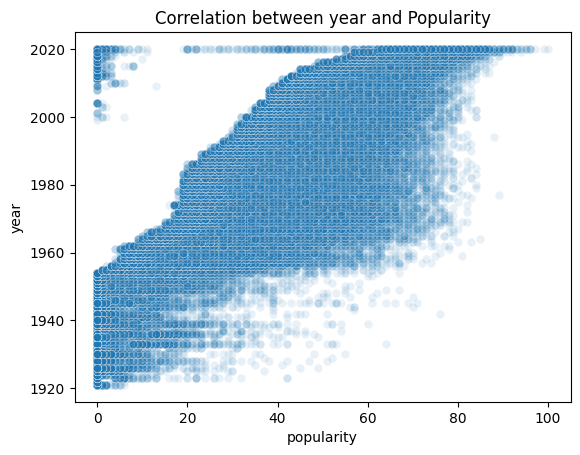

In [39]:
correlation3 = df['year'].corr(df['popularity'])
print(f"Corr b/w year and popularity is {correlation3}")
sns.scatterplot(x='popularity', y='year', data=df, alpha=0.1)

plt.title('Correlation between year and Popularity')

Corr b/w instrumentalness and popularity is -0.2967502543259352


Text(0.5, 1.0, 'Correlation between Danceability Instrumentalness and Popularity')

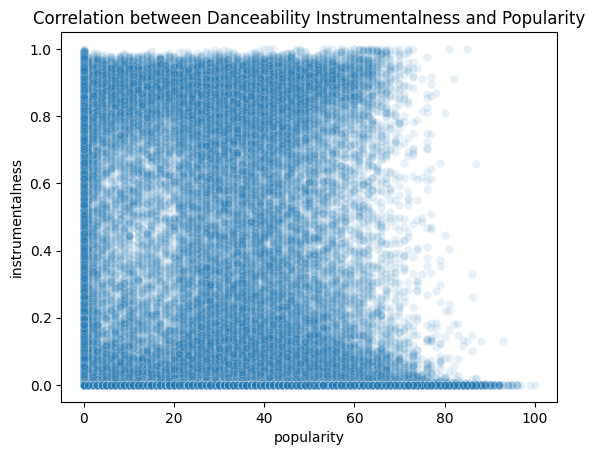

In [40]:
correlation4 = df['instrumentalness'].corr(df['popularity'])
print(f"Corr b/w instrumentalness and popularity is {correlation4}")

sns.scatterplot(x='popularity', y='instrumentalness', data=df, alpha=0.1)

plt.title('Correlation between Danceability Instrumentalness and Popularity')

Corr b/w liveness and popularity is -0.07646407487238253


Text(0.5, 1.0, 'Correlation between liveness and Popularity')

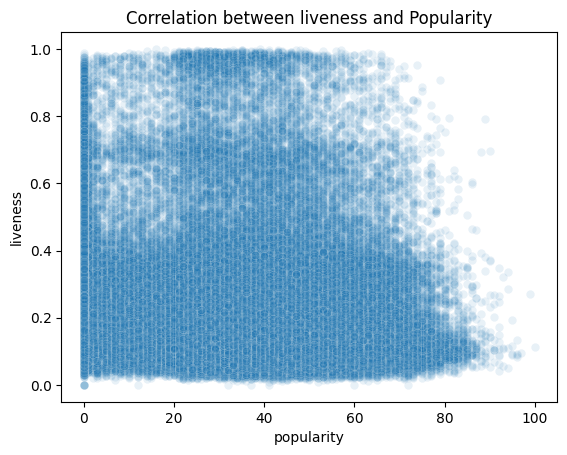

In [41]:
correlation5 = df['liveness'].corr(df['popularity'])
print(f"Corr b/w liveness and popularity is {correlation5}")

sns.scatterplot(x='popularity', y='liveness', data=df, alpha=0.1)

plt.title('Correlation between liveness and Popularity')

Corr b/w loudness and popularity is 0.45705061592165486


Text(0.5, 1.0, 'Correlation between liveness and Popularity')

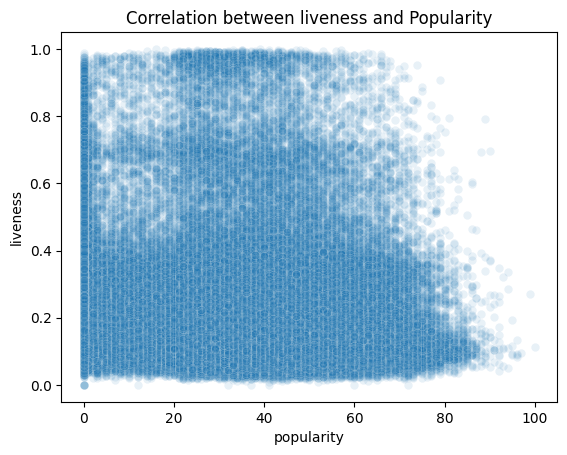

In [42]:
correlation = df['loudness'].corr(df['popularity'])
print(f"Corr b/w loudness and popularity is {correlation}")

sns.scatterplot(x='popularity', y='liveness', data=df, alpha=0.1)

plt.title('Correlation between liveness and Popularity')

Corr b/w mode and popularity is -0.02889705706700695


Text(0.5, 1.0, 'Correlation between Mode and Popularity')

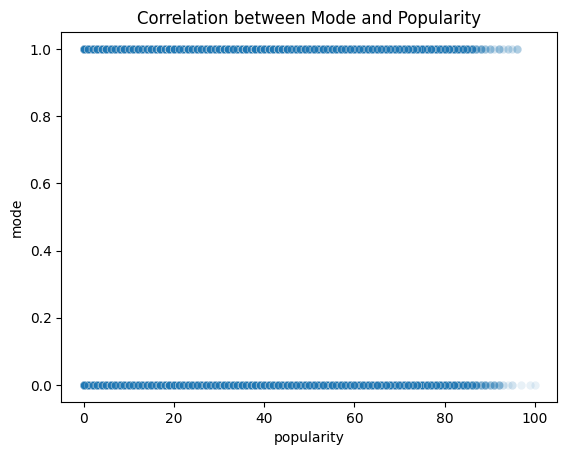

In [43]:
correlation = df['mode'].corr(df['popularity'])
print(f"Corr b/w mode and popularity is {correlation}")
sns.scatterplot(x='popularity', y='mode', data=df, alpha=0.1)

plt.title('Correlation between Mode and Popularity')

Corr b/w speechiness and popularity is -0.17197871776654758


Text(0.5, 1.0, 'Correlation between Speechiness and Popularity')

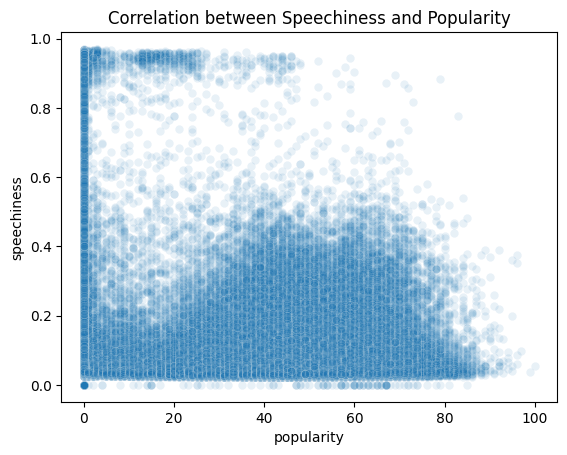

In [44]:
correlation = df['speechiness'].corr(df['popularity'])
print(f"Corr b/w speechiness and popularity is {correlation}")

sns.scatterplot(x='popularity', y='speechiness', data=df, alpha=0.1)

plt.title('Correlation between Speechiness and Popularity')

In [45]:
correlation = df['tempo'].corr(df['popularity'])
print(f"Corr b/w tempo and popularity is {correlation}")

Corr b/w tempo and popularity is 0.13331015465969337


In [46]:
correlation = df['valence'].corr(df['popularity'])
print(f"Corr b/w valence and popularity is {correlation}")

Corr b/w valence and popularity is 0.014200433403751348


#Trying to make prediction based on energy and popularity

Text(0, 0.5, 'Popularity')

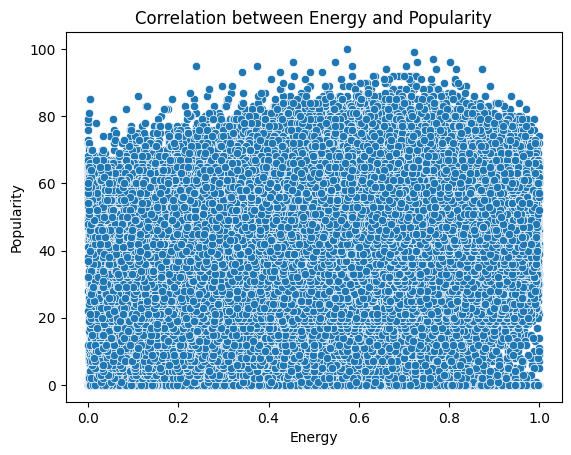

In [47]:
# Scatter plot between pupolarity and energy

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
sns.scatterplot(x='energy', y='popularity', data=df)

plt.title('Correlation between Energy and Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')


